In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn import svm
rcParams['figure.figsize'] = 6, 4

## Task 1 (5+5+5+5+5=25 pts)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

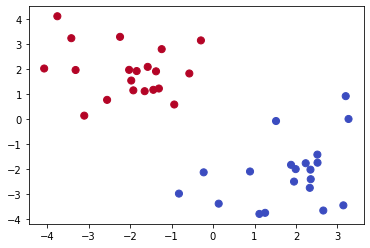

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

#### a. Report the separating hyperplane (line).

In [3]:
# Fit the model.  Using a linear SVM; very large penalty for misclassification.
# Since the data is linearly separable, it won't misclassify any points.
clf = svm.SVC(kernel='linear',C=10**5)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

#### b. List the support vectors.

In [4]:
b = clf.support_vectors_
print(b)

[[-0.22627536 -2.11810965]
 [ 1.5180363  -0.06399383]
 [-0.93564585  0.5969359 ]]


#### c. Calculate the upper and lower hyperplanes (lines) of the margin.

In [5]:
#calculate the parallels to the separating hyperplane (slope = a) that go through the support vectors.

b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])


#### d. Compute the width of the margin.

In [6]:
# Create a line perpendicular to the hyperplane and the upper/lower support vector.
# Calculate the distance and multiple by two to get the margin width

b = clf.support_vectors_[-1]
b_up = (b[1] - a * b[0])
b_db = - (clf.intercept_[0]) / w[1]
M = 2 * abs(b_up - b_db) / ((a * a) +1)**(1/2)
print(M)

2.298337786782621


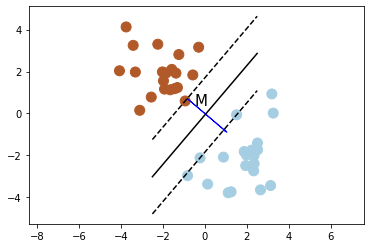

In [7]:
#equation for the perpendicular line
x2_perp = -x1/a
#solve for the (x,y) coordinated at intersection point to map the margin on a plot
#solve eqs: x2_perp = x2_up
# -x1/a = a * x1 + b_up --> x = -b_up *(a/(1+a**2)), y = b_up/(1+a**2)
xup = -b_up *(a/(1+a**2))
yup = b_up/(1+a**2)
#solve eqs: x2_perp = x2
# -x1/a = a * x1 + b_db --> x = -b_db *(a/(1+a**2)), y = b_db/(1+a**2)
xdb = -b_db *(a/(1+a**2))
ydb = b_db/(1+a**2)

dx = xdb - xup
dy = yup - ydb

#plot
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
#plt.plot(x1, x2_perp, 'r--', alpha = 0.5)
plt.axis('equal')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=100)
plt.arrow(xup, yup, 2*dx, -2*dy, fc="b", ec="b", head_width=0.07, head_length=0.2)
plt.annotate("M", xy=(-0.5, 0.4), fontsize=15)
plt.show()

#### e. What would you expect to happen to the margin if the constant C was made very small?

C is the regularization parameter that determines how much misclassification is allowed in our model. Since our original C was large, we were running a hard margin SVM that did not allow for any misclassification. In theory, if we decrease C, our margin will increase and allow for misclassification. However, our data is linearly seperable and regardless of C value, the SVM model will not misclassify any points.

2.298337786782621


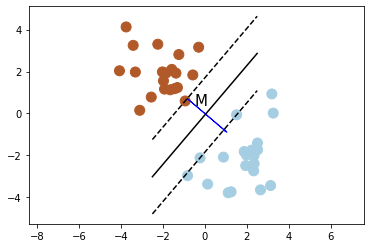

In [8]:
# Fit the model.  Using a linear SVM; very large penalty for misclassification.
# Since the data is linearly separable, it won't misclassify any points.
clf = svm.SVC(kernel='linear',C=0.5)  
clf.fit(X, Y)

# get the separating hyperplane w[0] x1 + w[1] x2 + intercept = 0
# transform to slope-intercept form: x2 = (-w[0]/w[1])x1 - (intercept/w[1])
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

# Create a line perpendicular to the hyperplane and the upper/lower support vector.
# Calculate the distance and multiple by two to get the margin width

b = clf.support_vectors_[-1]
b_up = (b[1] - a * b[0])
b_db = - (clf.intercept_[0]) / w[1]
M = 2 * abs(b_up - b_db) / ((a * a) +1)**(1/2)
print(M)

#equation for the perpendicular line
x2_perp = -x1/a
#solve for the (x,y) coordinated at intersection point to map the margin on a plot
#solve eqs: x2_perp = x2_up
# -x1/a = a * x1 + b_up --> x = -b_up *(a/(1+a**2)), y = b_up/(1+a**2)
xup = -b_up *(a/(1+a**2))
yup = b_up/(1+a**2)
#solve eqs: x2_perp = x2
# -x1/a = a * x1 + b_db --> x = -b_db *(a/(1+a**2)), y = b_db/(1+a**2)
xdb = -b_db *(a/(1+a**2))
ydb = b_db/(1+a**2)

dx = xdb - xup
dy = yup - ydb

#plot
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
#plt.plot(x1, x2_perp, 'r--', alpha = 0.5)
plt.axis('equal')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, cmap=plt.cm.Paired,s=100)
plt.arrow(xup, yup, 2*dx, -2*dy, fc="b", ec="b", head_width=0.07, head_length=0.2)
plt.annotate("M", xy=(-0.5, 0.4), fontsize=15)
plt.show()

## Task 2 (4+8+8=20 pts)

### Given the dataset provided below, answer the following questions:

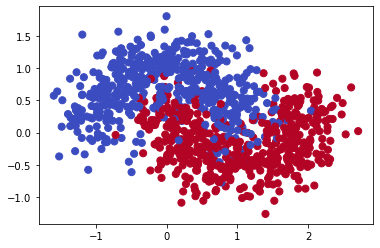

In [9]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy.

In [10]:
# Fit the model.  Using a polynomial SVM with all default parameters
clf = svm.SVC(kernel='poly')  
clf.fit(X_train, Y_train)

correct_OS =1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)
correct_IS = 1.0*(clf.predict(X_train)==Y_train).sum()/len(Y_train)

print(f'In sample R-squared value is {correct_IS}')
print(f'Out of sample R-squared value is {correct_OS}')

In sample R-squared value is 0.8567164179104477
Out of sample R-squared value is 0.8666666666666667


### Next we will use the validation subset in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree.


In [11]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train,X_val,Y_train,Y_val = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

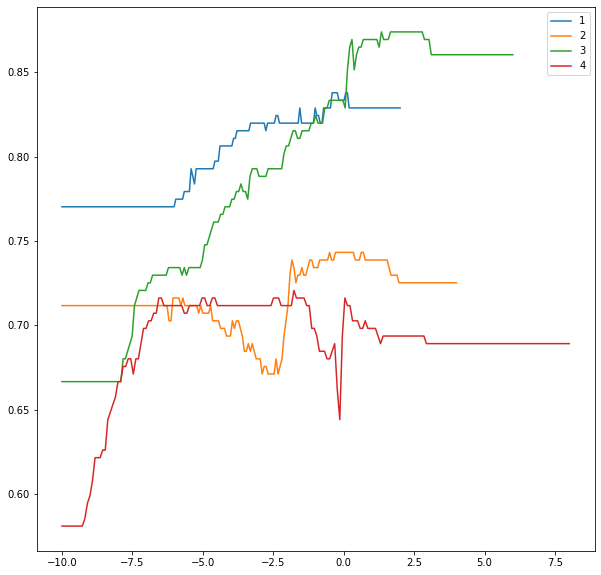

In [12]:
import math

degree = range(1,5)
fig, ax = plt.subplots(figsize = (10,10))

for deg in degree:
    OS = []
    C = [math.exp(i) for i in np.linspace(-10,2*deg,200)]
    for c in C:
        clf = svm.SVC(kernel='poly', degree = deg, C = c, random_state = 0)  
        clf.fit(X_train, Y_train)
        OS.append(1.0*(clf.predict(X_val)==Y_val).sum()/len(Y_val))
    ax.plot(np.log(C),OS, label = str(deg))
plt.legend()

### c. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected. 

In [13]:
#looks like deg = 3 gives the highest validation accuracy rerun with degree = 3 and find the optimal C value
OS = []
C = [math.exp(i) for i in np.linspace(-10,2,200)]
for c in C:
    clf = svm.SVC(kernel='poly', degree = 3, C = c, random_state = 0)  
    clf.fit(X_train, Y_train)
    OS.append(1.0*(clf.predict(X_val)==Y_val).sum()/len(Y_val))

C_opt = C[np.argmax(OS)]
print(f'The optimal C value is {C_opt}')
#run final svm with optimal C and degree = 1 and report OS r2 over the test set
clf = svm.SVC(kernel='poly', degree = 1, C = C_opt)  
clf.fit(X_train, Y_train)
acc = (1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test))
print(f'The final out of sample accuracy is {acc}')

The optimal C value is 3.806398311933802
The final out of sample accuracy is 0.8666666666666667


## Task 3 (5+5=10pts).

### This task is to be done by hand rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes



### Questions:

a) Calculate the following sample probabilities:

P(Yes): 6/11

P(No): 5/11

P(Red|Yes): 5/6

P(SUV|Yes): 2/6

P(Domestic|Yes): 3/6

P(Red|No): 2/5

P(SUV|No): 3/5

P(Domestic|No): 3/5

b) Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work.


$P(Red|Yes) * P(Domestic|Yes) * P(Yes) = 5/6 * 3/6 * 6/11 = 90/396 = 0.227$


## Task 4 (4+2+2+2=10pts)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [14]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre    glu  blood_p  triceps  serum   b_m  pedigree_f   age
0    3.0  158.0     64.0     13.0  387.0  31.2       0.295  24.0
1    0.0   84.0     64.0     22.0   66.0  35.8       0.545  21.0
2    9.0  120.0     72.0     22.0   56.0  20.8       0.733  48.0
3    4.0  110.0     76.0     20.0  100.0  28.4       0.118  27.0
4    2.0  100.0     66.0     20.0   90.0  32.9       0.867  28.0


### a) What is the prediction accuracy for Naive Bayes, both in sample (on the training data) and out of sample (on the test data)?

In [15]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
trained_model = gnb.fit(X_train,y_train)
y_pred_train = trained_model.predict_proba(X_train)[:,1]
y_pred_test = trained_model.predict_proba(X_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_train)/len(y_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_test)/len(y_test))


In sample prediction accuracy: 0.7584745762711864
Out of sample prediction accuracy: 0.7911392405063291


### b) What is the prior probability of diabetes, learned from the training data?

In [16]:
prior = 1.*y_train.sum()/y_train.count()
print(f'The prior probability of diabetes from the training data is {prior}')

The prior probability of diabetes from the training data is 0.3008474576271186


### c) What is the mean and variance of each input variable for patients with diabetes?

In [17]:
#diabetes
X = X_train[y_train==1]
for j in X.columns:
    mu = round(X[j].mean(),3)
    std = round(X[j].std(),3)
    
    print(f'{j} is {mu} +/- {std}')

t_pre is 4.07 +/- 3.519
glu is 144.141 +/- 30.626
blood_p is 74.563 +/- 13.799
triceps is 33.479 +/- 9.763
serum is 209.211 +/- 126.921
b_m is 35.224 +/- 6.258
pedigree_f is 0.639 +/- 0.439
age is 35.789 +/- 10.264


### d) What is the mean and variance of each input variable for patients without diabetes?

In [18]:
# no diabetes
X = X_train[y_train==0]
for j in X.columns:
    mu = round(X[j].mean(),3)
    std = round(X[j].std(),3)
    
    print(f'{j} is {mu} +/- {std}')

t_pre is 2.691 +/- 2.61
glu is 111.467 +/- 24.692
blood_p is 69.206 +/- 11.713
triceps is 27.2 +/- 10.437
serum is 127.006 +/- 91.486
b_m is 31.709 +/- 6.338
pedigree_f is 0.469 +/- 0.292
age is 28.394 +/- 8.537


## Task 5 (10+15=25 pts)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [19]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  2  2
2  2  6  2
3  6  6  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  1
8  5  1  6
0    0
1    1
2    0
3    0
4    1
5    0
6    0
7    1
8    1
Name: y, dtype: int64


### a) Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy.

In [20]:
gnb = GaussianNB()
trained_model = gnb.fit(X_Labeled_train,y_Labeled_train)
y_pred_train = trained_model.predict_proba(X_Labeled_train)[:,1]
y_pred_test = trained_model.predict_proba(X_Labeled_test)[:,1]

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In sample prediction accuracy: 0.8888888888888888
Out of sample prediction accuracy: 0.9722222222222222


### b) Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer). 

In [21]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [22]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)
for i,j in naive_bayes_classifier.items():
    print(i)
    print(j)
    print()
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# check if labels switched
if (1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test) < 0.5):
    y_pred_test = 1.0-y_pred_test
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
prior
0.5031458420646681

0_1
{4: 0.08725430571359676, 2: 0